In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

In [ ]:
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

Let's group the features into numerical and categorical

In [ ]:
train_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
cat_feat = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','Utilities','LotConfig','LandSlope',
            'Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual', 'OverallCond','RoofStyle',
            'RoofMatl','Exterior1st','Exterior2nd', 'MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
            'BsmtCond', 'BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC', 'CentralAir', 'Electrical',
            'KitchenQual','Functional','FireplaceQu', 'GarageType','GarageFinish','GarageQual','GarageCond', 
            'PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition']
num_feat = ['LotFrontage','LotArea', 'YearBuilt', 'YearRemodAdd','MasVnrArea',
            'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','1stFlrSF', '2ndFlrSF','LowQualFinSF','GrLivArea', 
            'BsmtFullBath', 'BsmtHalfBath', 'FullBath','HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd',
            'Fireplaces','GarageYrBlt','GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF','EnclosedPorch', 
            '3SsnPorch', 'ScreenPorch', 'PoolArea','MiscVal', 'MoSold', 'YrSold']

check whether we got all the features except SalePrice and Id

In [ ]:
len(cat_feat)+len(num_feat)

79

# Missing Values

Let's fill the missing values in numerical features with the mean of the column while the missing values in categorical features with 'None'

In [ ]:
def missing_values(data):
    data = data.fillna(data.mean())
    data = data.fillna('None')
    return data

In [ ]:
table=train_data.isnull().sum()
table.loc[table>1]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
data=train_data.copy()
data = missing_values(data)
table=data.isnull().sum()
table.loc[table>1]

Series([], dtype: int64)

# Feature Selection

let's generate a correlation matrix to see how each numerical feature correlates with the target feature

In [ ]:
clean_data = data.copy()
num_data = clean_data[num_feat+['SalePrice']]
num_data

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,85.0,13175,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,66.0,9042,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,68.0,9717,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [ ]:
corr_matrix = num_data.corr()
table = corr_matrix['SalePrice'].sort_values(ascending=False)
table

SalePrice        1.000000
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

Based on the correlation values, we can drop some features that don't have much correlation to SalePrice. we can set our threshold to 0.2 

In [ ]:
drop_num_feat = table.loc[table<0.2].index.tolist()
drop_num_feat

['BedroomAbvGr',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 '3SsnPorch',
 'BsmtFinSF2',
 'BsmtHalfBath',
 'MiscVal',
 'LowQualFinSF',
 'YrSold',
 'EnclosedPorch',
 'KitchenAbvGr']

We can see that 12 numerical features will be dropped from 33 total numerical features

In [ ]:
def select_num(data):
    data = data.drop(drop_num_feat, axis=1)
    new_num_feat = list(set(num_feat)-set(drop_num_feat))
    return data, new_num_feat

In [ ]:
clean_data=train_data.copy()
new_num_data, num_feat = select_num(clean_data)
new_num_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,GasA,Ex,Y,SBrkr,856,854,1710,1,2,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,NaN,NaN,NaN,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,GasA,Ex,Y,SBrkr,1262,0,1262,0,2,0,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,NaN,NaN,NaN,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,GasA,Ex,Y,SBrkr,920,866,1786,1,2,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,NaN,NaN,NaN,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,540,756,GasA,Gd,Y,SBrkr,961,756,1717,1,1,0,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,NaN,NaN,NaN,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,490,1145,GasA,Ex,Y,SBrkr,1145,1053,2198,1,2,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,NaN,NaN,NaN,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,953,953,GasA,Ex,Y,SBrkr,953,694,1647,0,2,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,NaN,NaN,NaN,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,589,1542,GasA,TA,Y,SBrkr,2073,0,2073,1,2,0,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,NaN,MnPrv,NaN,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,877,1152,GasA,Ex,Y,SBrkr,1188,1152,2340,0,2,0,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,NaN,GdPrv,Shed,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,0,1078,GasA,Gd,Y,FuseA,1078,0,1078,1,1,0,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,NaN,NaN,NaN,WD,Normal,142125


The function indeed works properly (81-12=69 features left)

# Feature Engineering

Let's generate histograms of the numerical features to see their distributions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e18679410>,
      dtype=object)

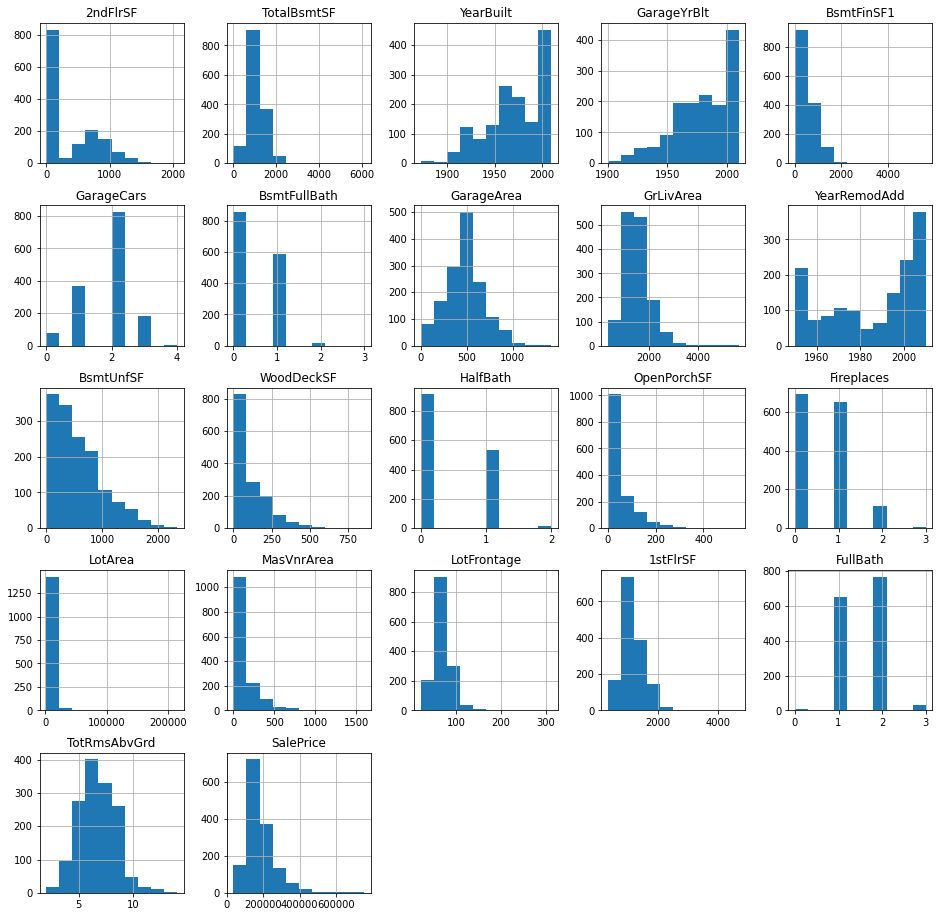

In [ ]:
data=train_data.copy()
data=missing_values(data)
data, num_feat=select_num(data)
data[num_feat+['SalePrice']].hist(figsize=(16,16))

We can see that some features may be improved using a log transformation to reduce its skewness

In [ ]:
for i in num_feat+['SalePrice']:
  print(i,data[i].skew())

2ndFlrSF 0.8130298163023265
TotalBsmtSF 1.5242545490627664
YearBuilt -0.613461172488183
GarageYrBlt -0.6681748227563908
BsmtFinSF1 1.685503071910789
GarageCars -0.3425489297486655
BsmtFullBath 0.596066609663168
GarageArea 0.17998090674623907
GrLivArea 1.3665603560164552
YearRemodAdd -0.5035620027004709
BsmtUnfSF 0.9202684528039037
WoodDeckSF 1.5413757571931312
HalfBath 0.675897448233722
OpenPorchSF 2.3643417403694404
Fireplaces 0.6495651830548841
LotArea 12.207687851233496
MasVnrArea 2.676411784729959
LotFrontage 2.3849501679427925
1stFlrSF 1.3767566220336365
FullBath 0.036561558402727165
TotRmsAbvGrd 0.6763408364355531
SalePrice 1.8828757597682129


In [ ]:
test = data.copy()
for i in num_feat+['SalePrice']:
  if (abs(data[i].skew()) > 0.5):
    test.loc[test[i]!=0,i] = np.log(test.loc[test[i]!=0,i])
    print(i,test[i].skew())

2ndFlrSF 0.2897007742543885
TotalBsmtSF -5.152704823478623
YearBuilt -0.6411436601290208
GarageYrBlt -0.6918931914491916
BsmtFinSF1 -0.6165921914408278
BsmtFullBath 9.754877031884304
GrLivArea -0.006995182187690808
YearRemodAdd -0.5110090895682697
BsmtUnfSF -2.1810461856675176
WoodDeckSF 0.15478057632466266
HalfBath 10.90501044297898
OpenPorchSF -0.01630566752186363
Fireplaces 3.1477479988411377
LotArea -0.1379938086958118
MasVnrArea 0.48325190810843277
LotFrontage -0.930795306661434
1stFlrSF 0.07915695223960692
TotRmsAbvGrd -0.19074605152009594
SalePrice 0.12133506220520406


We can colect features that benefit from a log transformation

In [ ]:
transform_feat = ['OpenPorchSF','MasVnrArea','GrLivArea','LotFrontage','2ndFlrSF','WoodDeckSF','1stFlrSF','BsmtFinSF1','LotArea']

Now let's create a function to perform log transformation on these features

In [ ]:
def log_trans(data):
    for i in transform_feat:
        print(i)
        print('before:',data[i].skew())
        if (abs(data[i].skew()) > 0.5):
            data.loc[data[i]!=0,i] = np.log(data.loc[data[i]!=0,i])
        print('after:',data[i].skew())
    if 'SalePrice' in data.columns:
        print('SalePrice')
        print('before:',data['SalePrice'].skew())
        data.loc[data['SalePrice']!=0,'SalePrice'] = np.log(data.loc[data['SalePrice']!=0,'SalePrice'])
        print('after:',data['SalePrice'].skew())
    return data

In [ ]:
test=data.copy()
test=log_trans(test)

OpenPorchSF
before: 2.3643417403694404
after: -0.01630566752186363
MasVnrArea
before: 2.676411784729959
after: 0.48325190810843277
GrLivArea
before: 1.3665603560164552
after: -0.006995182187690808
LotFrontage
before: 2.3849501679427925
after: -0.930795306661434
2ndFlrSF
before: 0.8130298163023265
after: 0.2897007742543885
WoodDeckSF
before: 1.5413757571931312
after: 0.15478057632466266
1stFlrSF
before: 1.3767566220336365
after: 0.07915695223960692
BsmtFinSF1
before: 1.685503071910789
after: -0.6165921914408278
LotArea
before: 12.207687851233496
after: -0.1379938086958118
SalePrice
before: 1.8828757597682129
after: 0.12133506220520406


We also want to convert the categorical features to one hot encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
cat_1hot = cat_encoder.fit_transform(test[cat_feat])
cat_1hot.shape

(1460, 301)

# Feature Scaling

We can use StandardScaler from sklearn to scale the numerical attributes 

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
x = std_scaler.fit_transform(test[num_feat])
x.shape

(1460, 21)

Finally we can create a pipeline to combine StandardScaler and OneHotEncoder

In [ ]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([
                                   ("num", StandardScaler(), num_feat),
                                   ("cat", OneHotEncoder(), cat_feat),
])

In [ ]:
data = test_data.copy()
data = missing_values(data)
data, num_feat = select_num(data)
data = log_trans(data)
data = full_pipeline.fit_transform(data)
data

OpenPorchSF
before: 2.6877788503224047
after: -0.053498333528818796
MasVnrArea
before: 2.5464736118448132
after: 0.5315959203794182
GrLivArea
before: 1.1304024140503506
after: 0.027623981154412496
LotFrontage
before: 0.7201883432352695
after: -1.1644364969917336
2ndFlrSF
before: 0.9128826344911904
after: 0.3210736446876086
WoodDeckSF
before: 2.130759950574929
after: 0.164330459394768
1stFlrSF
before: 1.558194572983426
after: 0.052526689855442475
BsmtFinSF1
before: 1.1660755540850445
after: -0.6175262730085165
LotArea
before: 3.115216613500925
after: -0.9160367674643524


<1459x311 sparse matrix of type '<class 'numpy.float64'>'
	with 97672 stored elements in Compressed Sparse Row format>

Let's generate a function to do all the preprocessing steps

In [ ]:
def preprocess(data):
    data_y = None
    data_id = data['Id'].to_numpy()
    if 'SalePrice' in data.columns:
        data_y = data['SalePrice'].to_numpy()
    data = missing_values(data)
    data, num_feat = select_num(data)
    data = log_trans(data)
    data_x = full_pipeline.fit_transform(data)
    data[cat_feat] = data[cat_feat].astype('str')
    panda = pd.get_dummies(data)
    col = panda.columns.drop(['Id','SalePrice'])
    
    return data_id, data_x, data_y, col

# Model Selection and Evaluation

First, we can generate a function to calculate the accuracy using cross validation

In [ ]:
from sklearn.model_selection import cross_val_score
def crossval(clf, data, label):
    clf.fit(data, label)
    predictions = clf.predict(data)
    accuracy = clf.score(data, label)
    print('Train accuracy is %.3f' %(accuracy))
    score = cross_val_score(clf,data,label, cv=3)
    print("%0.3f cross validation accuracy with a standard deviation of %0.3f" % (score.mean(), score.std()))

Let's also create a function to output the accuracy scores and plot the least important features

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
def output(clf, data, label, lower, upper):
    crossval(clf, data, label)
    coef = pd.Series(clf.coef_, index = col)
    unimp_coef = coef.sort_values()[lower:-upper]
    matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
    unimp_coef.plot(kind = "barh")
    plt.title("Least Important Coefficients in the %s Model"%clf)
    plt.show()

In [ ]:
data = train_data.copy()
train_id, train_x, train_y, col = preprocess(data)
print(train_id.shape)
print(train_x.shape)
print(train_y.shape)

OpenPorchSF
before: 2.3643417403694404
after: -0.01630566752186363
MasVnrArea
before: 2.676411784729959
after: 0.48325190810843277
GrLivArea
before: 1.3665603560164552
after: -0.006995182187690808
LotFrontage
before: 2.3849501679427925
after: -0.930795306661434
2ndFlrSF
before: 0.8130298163023265
after: 0.2897007742543885
WoodDeckSF
before: 1.5413757571931312
after: 0.15478057632466266
1stFlrSF
before: 1.3767566220336365
after: 0.07915695223960692
BsmtFinSF1
before: 1.685503071910789
after: -0.6165921914408278
LotArea
before: 12.207687851233496
after: -0.1379938086958118
SalePrice
before: 1.8828757597682129
after: 0.12133506220520406
(1460,)
(1460, 322)
(1460,)


1. Linear Regression

Train accuracy is 0.930
0.819 cross validation accuracy with a standard deviation of 0.051


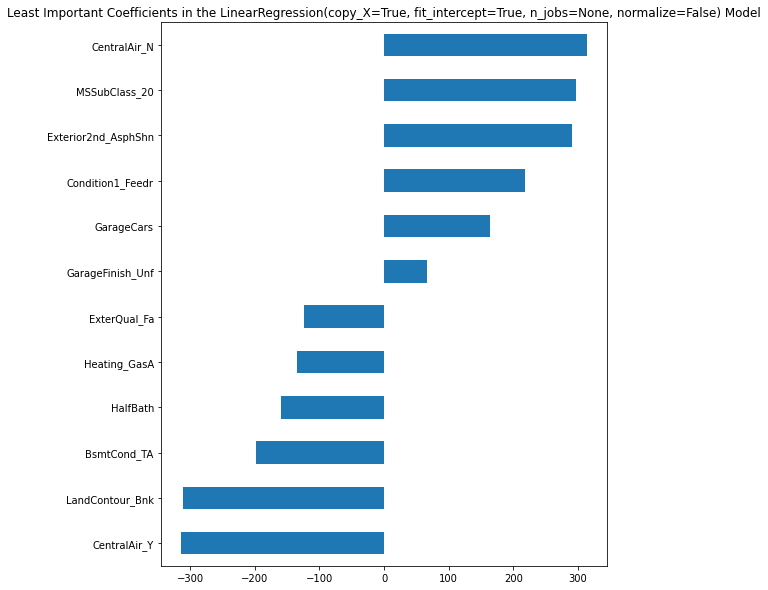

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
output(clf, train_x, train_y, 140, 170)

2. Gradient Descent

Train accuracy is 0.889
0.838 cross validation accuracy with a standard deviation of 0.041


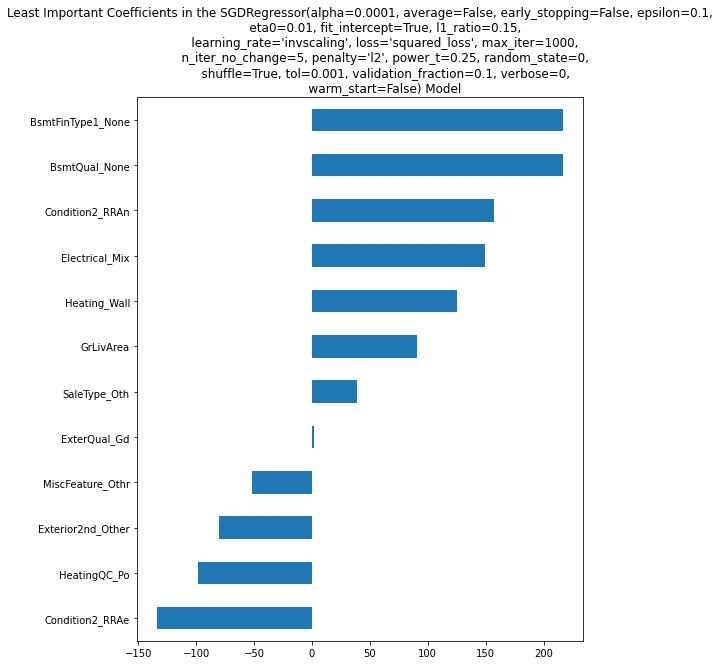

In [ ]:
from sklearn.linear_model import SGDRegressor
clf = SGDRegressor(random_state=0)
output(clf, train_x, train_y, 115, 195)

3. Ridge Regression

Train accuracy is 0.918
0.834 cross validation accuracy with a standard deviation of 0.050


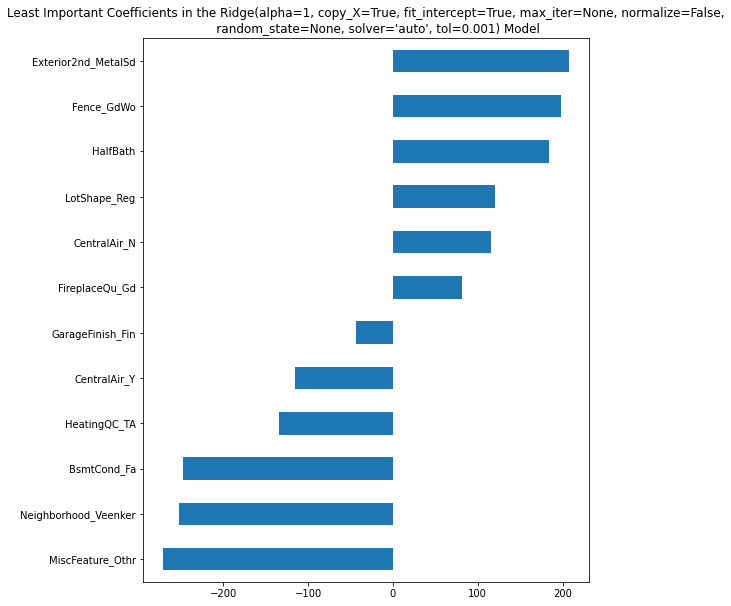

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1, solver="auto")
output(clf, train_x, train_y, 145, 165)

4. Lasso Regression  
  preferred over Ridge when only a few features are useful

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125171825477.18109, tolerance: 920791133.4609975
  max_iter, tol, rng, random, positive)


Train accuracy is 0.930


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 90421341495.42102, tolerance: 623680236.5760012
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 76705316678.58047, tolerance: 590585261.3683215
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 87517779166.27023, tolerance: 627039531.548137
  max_iter, tol, rng, random, positive)


0.821 cross validation accuracy with a standard deviation of 0.054


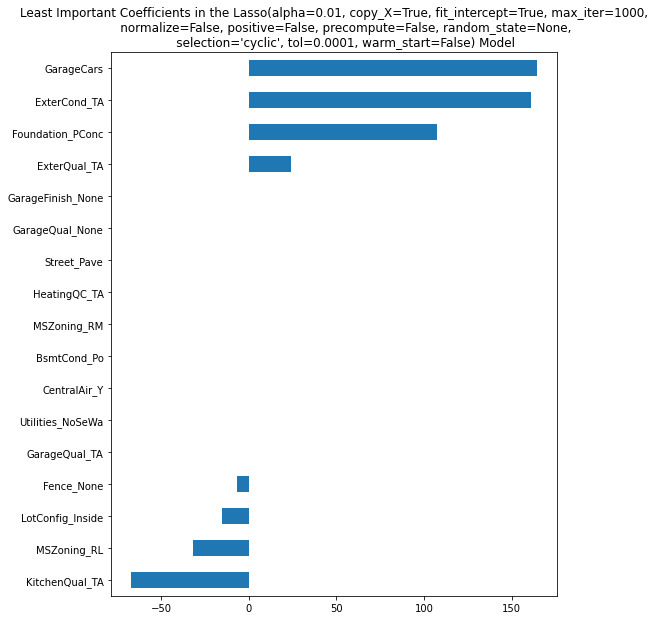

In [ ]:
from sklearn.linear_model import Lasso
clf = Lasso(alpha=0.01)
output(clf, train_x, train_y, 155, 150)

5. Elastic Net  
 preferred over Lasso when #features>#training instances

Train accuracy is 0.867
0.834 cross validation accuracy with a standard deviation of 0.045


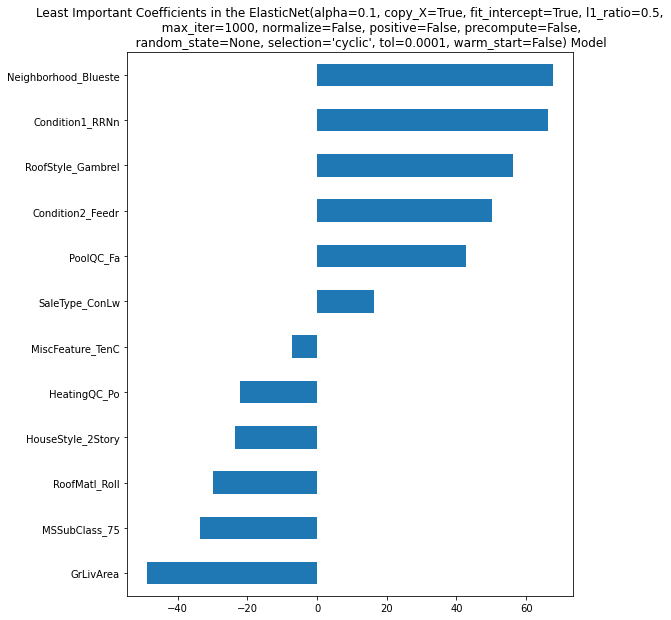

In [ ]:
from sklearn.linear_model import ElasticNet
clf = ElasticNet(alpha=0.1, l1_ratio=0.5)
output(clf, train_x, train_y, 173, 137)

Based on the plots we can conclude that several features that are not important are:  
GarageFinish, Heating, CentralAir, and HeatingQC

# Feature Selection (2)

After finding irrelevant categorical features from the models, we can perform another feature selection to remove those features.

In [ ]:
def select_cat(data):
    drop_cat_feat = ['GarageFinish', 'Heating', 'HeatingQC', 'CentralAir']
    data = data.drop(drop_cat_feat, axis=1)
    new_cat_feat = list(set(cat_feat)-set(drop_cat_feat))
    return data, new_cat_feat

In [ ]:
data, cat_feat = select_cat(train_data)
cat_feat

['BsmtFinType1',
 'GarageType',
 'BsmtQual',
 'SaleType',
 'BsmtExposure',
 'ExterCond',
 'OverallQual',
 'LandContour',
 'Street',
 'Exterior2nd',
 'Exterior1st',
 'MiscFeature',
 'Neighborhood',
 'ExterQual',
 'Foundation',
 'Electrical',
 'PoolQC',
 'Condition2',
 'BsmtFinType2',
 'LandSlope',
 'SaleCondition',
 'GarageQual',
 'HouseStyle',
 'Functional',
 'Fence',
 'FireplaceQu',
 'BsmtCond',
 'MSSubClass',
 'LotConfig',
 'Alley',
 'MasVnrType',
 'OverallCond',
 'KitchenQual',
 'Condition1',
 'GarageCond',
 'PavedDrive',
 'LotShape',
 'Utilities',
 'MSZoning',
 'RoofStyle',
 'BldgType',
 'RoofMatl']

Let's make a method to combine both categorical and numerical feature selection

In [ ]:
def feat_select(data):
    data, new_num_feat = select_num(data)
    data, new_cat_feat = select_cat(data)
    return data, new_num_feat, new_cat_feat

We also need to rerun the full pipeline to update it.

In [ ]:
full_pipeline = ColumnTransformer([
                                   ("num", StandardScaler(), num_feat),
                                   ("cat", OneHotEncoder(), cat_feat),
])

Let's update our preprocessing function using our new feature selection method

In [ ]:
def preprocess(data):
    data_y = None
    data_id = data['Id'].to_numpy()
    if 'SalePrice' in data.columns:
        data_y = data['SalePrice'].to_numpy()
    data = missing_values(data)
    data, num_feat, cat_feat = feat_select(data)
    data = log_trans(data)
    data_x = full_pipeline.fit_transform(data)
    data[cat_feat] = data[cat_feat].astype('str')
    panda = pd.get_dummies(data)
    col = panda.columns.drop(['Id','SalePrice'])
    
    return data_id, data_x, data_y, col

In [ ]:
new_train_id, new_train_x, new_train_y, col = preprocess(train_data)
print(new_train_x.shape)

OpenPorchSF
before: 2.3643417403694404
after: -0.01630566752186363
MasVnrArea
before: 2.676411784729959
after: 0.48325190810843277
GrLivArea
before: 1.3665603560164552
after: -0.006995182187690808
LotFrontage
before: 2.3849501679427925
after: -0.930795306661434
2ndFlrSF
before: 0.8130298163023265
after: 0.2897007742543885
WoodDeckSF
before: 1.5413757571931312
after: 0.15478057632466266
1stFlrSF
before: 1.3767566220336365
after: 0.07915695223960692
BsmtFinSF1
before: 1.685503071910789
after: -0.6165921914408278
LotArea
before: 12.207687851233496
after: -0.1379938086958118
SalePrice
before: 1.8828757597682129
after: 0.12133506220520406
(1460, 305)


Let's create another function to compute all the 5 models

In [ ]:
def output_all(data, label):
    clf = LinearRegression()
    output(clf, data, label, 130, 160)
    clf = SGDRegressor(random_state=0)
    output(clf, data, label, 105, 185)
    clf = Ridge(alpha=1, solver="auto")
    output(clf, data, label, 140, 150)
    clf = Lasso(alpha=0.01)
    output(clf, data, label, 145, 145)
    clf = ElasticNet(alpha=0.1, l1_ratio=0.5)
    output(clf, data, label, 160, 130)

Train accuracy is 0.930
0.819 cross validation accuracy with a standard deviation of 0.051


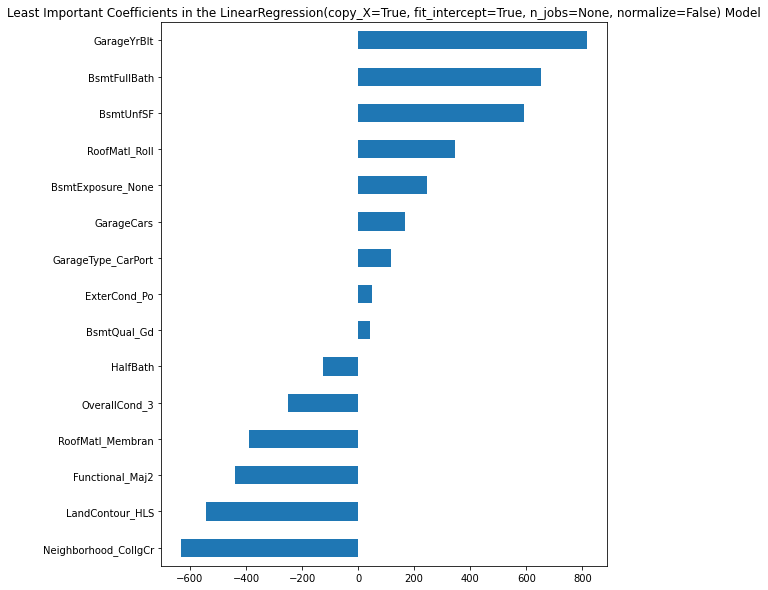

Train accuracy is 0.889
0.839 cross validation accuracy with a standard deviation of 0.040


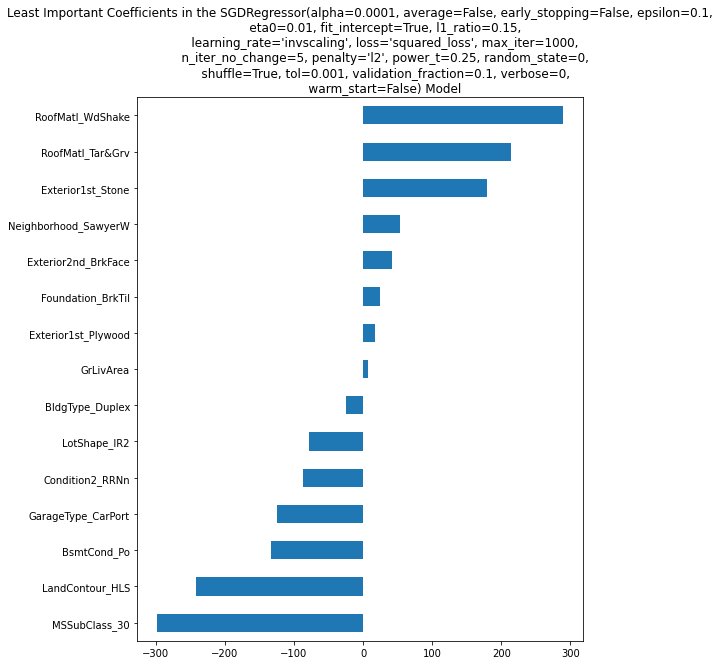

Train accuracy is 0.918
0.834 cross validation accuracy with a standard deviation of 0.049


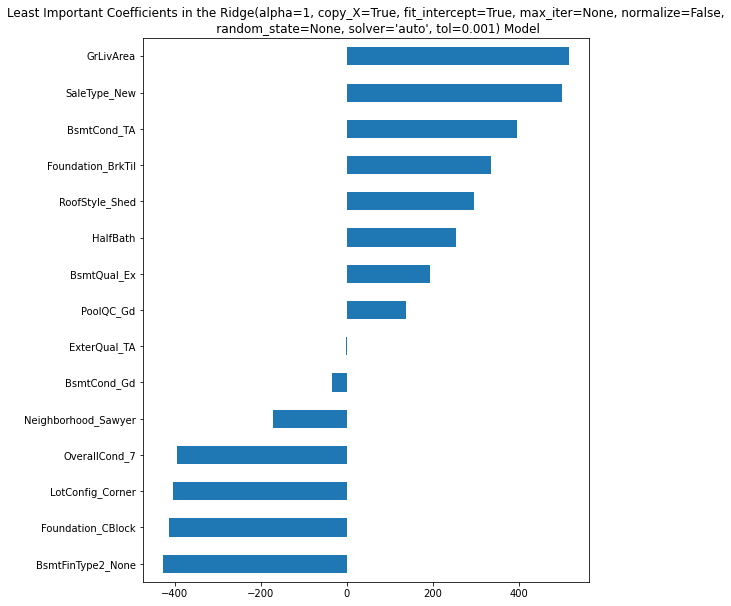

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 181161689018.89163, tolerance: 920791133.4609975
  max_iter, tol, rng, random, positive)


Train accuracy is 0.930


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 137706973879.9721, tolerance: 623680236.5760012
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 91149649204.40443, tolerance: 590585261.3683215
  max_iter, tol, rng, random, positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:460: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 125239849226.8335, tolerance: 627039531.548137
  max_iter, tol, rng, random, positive)


0.821 cross validation accuracy with a standard deviation of 0.054


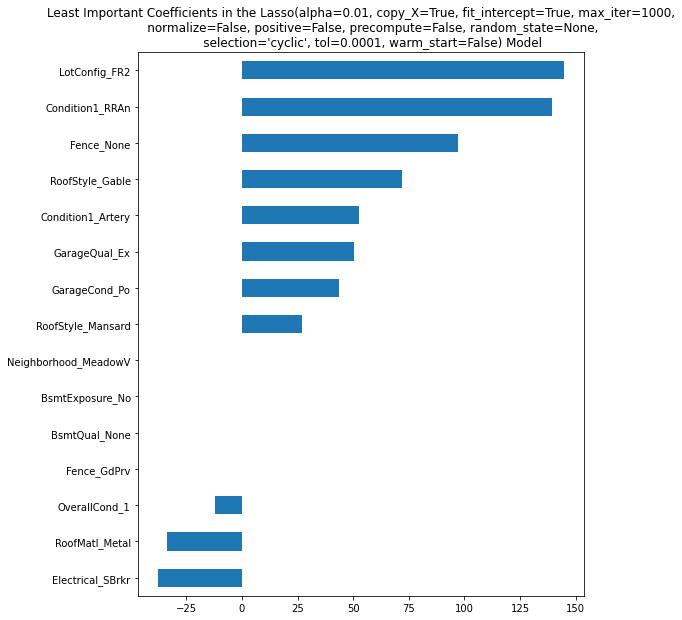

Train accuracy is 0.867
0.833 cross validation accuracy with a standard deviation of 0.046


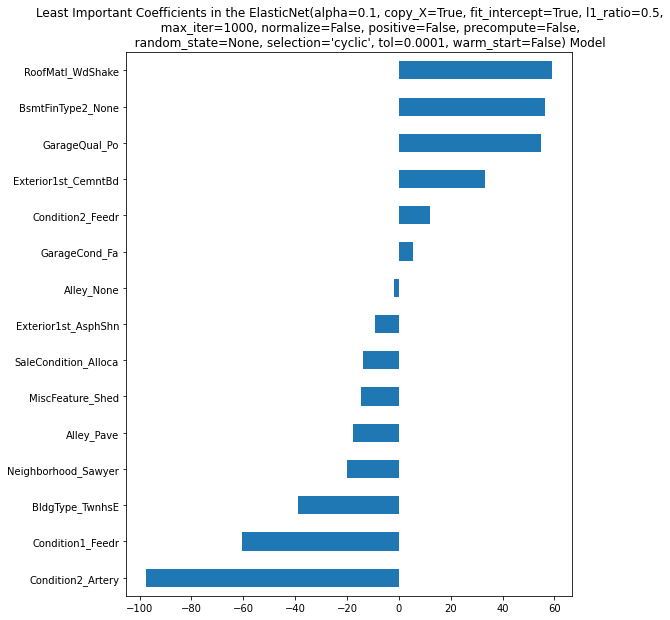

In [ ]:
output_all(new_train_x, new_train_y)

# Generate Output

Since the unique values in training and test datasets are different, it will result in a different number of final features if preprocessing is performed separately. Therefore, we can fix this issue by combining the training and test datasets first then preprocess it.

In [ ]:
full_data = pd.concat([train_data, test_data])
data_id, data_x, data_y, _ = preprocess(full_data)

OpenPorchSF
before: 2.5364173160468444
after: -0.03485810597569548
MasVnrArea
before: 2.6128922658215994
after: 0.5070265614680862
GrLivArea
before: 1.2700104075191514
after: 0.012385663552313695
LotFrontage
before: 1.6464199597415903
after: -1.0560989089936061
2ndFlrSF
before: 0.8621178325657642
after: 0.3052669280430415
WoodDeckSF
before: 1.8433802126628294
after: 0.15947507395338786
1stFlrSF
before: 1.4703601055379227
after: 0.06389503599930446
BsmtFinSF1
before: 1.4259663133939777
after: -0.616729672350598
LotArea
before: 12.829024853018762
after: -0.5055422016251054
SalePrice
before: 2.66096398279115
after: -0.2548420145894841


Then, we can extract the respective training and test datasets after preprocessing to get the same number of columns

In [ ]:
train_id, train_x, train_y = data_id[:1460], data_x[:1460], data_y[:1460]
test_id, test_x, _ = data_id[1460:], data_x[1460:], data_y[1460:]

Finally, we can perform the best model to predict the test dataset and do a submission

In [ ]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1, solver="auto", random_state=0)
clf.fit(train_x, train_y)
predictions = clf.predict(test_x)
output = pd.DataFrame({'Id': test_id,
                      'SalePrice': predictions})
output.shape

(1459, 2)

In [ ]:
output.to_csv('my_submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


We got a score of 0.18466 on Kaggle. Not bad!